# Chronic Kidney Disease Prediction
In this notebook, we will attempt to make machine learning models using **Chronic Kindey Disease Data**, which in return identifies whether a person may have chronic kidney disease or not.

# Importing Libraries

In [ ]:
# importing python libraries
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

## Load the Data

In [ ]:
# load the data
kidney_data = pd.read_csv('/content/drive/My Drive/kidney_disease.csv')

print(kidney_data.shape)
print('Number of rows: %s' % str(kidney_data.shape[0]))
print('Number of columns: %s' % str(kidney_data.shape[1]))

(400, 26)
Number of rows: 400
Number of columns: 26


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
kidney_data.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
# get some statistical information
kidney_data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
# print dataset columns
kidney_data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
print(kidney_data['dm'])

0      yes
1       no
2      yes
3       no
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: dm, Length: 400, dtype: object


## Data Preprocessing
Our data contains missing, null and Nan values, and it also contains categorical values which need to be converted to numerical form. We will undergo data preprocessing steps in below section to make data ready for modelling. This step includes:
* Checking for null, missing and NaN values
* Removing null, missing and NaN values
* Getting the the ready in a form to apply machine learning

In [ ]:
kidney_data.shape

(400, 26)

We have a total of **400** samples and **26** features in data.

In [ ]:
kidney_data = kidney_data.drop('id', axis=1)

In [ ]:
kidney_data.head(3)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [ ]:
# make column names easy to comprehend
'''
The column names are named in abbreviative manner. For making a comprehension about them, we will rename it in way that
it could be understood easily.
'''
kidney_data.columns = ['age', 'blood_pressure', 'specific_gravity', 
                      'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
                      'pus_cell_clumps', 'bacteria', 'blood_gulucose_random', 
                      'blood_uera', 'serum_creatinine', 'sodium', 'potassium',
                      'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 
                      'red_blood_cell_count', 'hypertension', 'diabetes_mallitus', 
                      'coronary_artery_disease', 'appetite', 'peda_edema',
                      'anaemia', 'class']

In [ ]:
kidney_data.head(4)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_gulucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mallitus,coronary_artery_disease,appetite,peda_edema,anaemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd


In [ ]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_gulucose_random    356 non-null    float64
 10  blood_uera               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

### Converting Columns to Numerical Types

In [ ]:
kidney_data['packed_cell_volume'] = pd.to_numeric(kidney_data['packed_cell_volume'], 
                                                 errors='coerce')
kidney_data['white_blood_cell_count'] = pd.to_numeric(kidney_data['white_blood_cell_count'], 
                                                     errors='coerce')
kidney_data['red_blood_cell_count'] = pd.to_numeric(kidney_data['white_blood_cell_count'], 
                                                     errors='coerce')

In [ ]:
print(kidney_data['white_blood_cell_count'].dtype)
print(kidney_data['packed_cell_volume'].dtype)
print(kidney_data['red_blood_cell_count'].dtype)

float64
float64
float64


### Extract Column Types

In [ ]:
# extract categorical & numerical columns
cat_cols = [i for i in kidney_data.columns if kidney_data[i].dtype=='object']
numeric_cols = [i for i in kidney_data.columns if kidney_data[i].dtype!='object']

In [ ]:
print('Number of categorical columns: %s' % str(len(cat_cols)))
print('Number of numerical columns: %s' % str(len(numeric_cols)))

Number of categorical columns: 11
Number of numerical columns: 14


In [ ]:
# check for missing values in each column
for c in cat_cols:
    print(f'{c} has {kidney_data[c].unique()} values\n')

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mallitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

anaemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [ ]:
# replacing incorrect values in columns
kidney_data['diabetes_mallitus'] = kidney_data['diabetes_mallitus'].replace(to_replace={'\tno': 'no', '\tyes': 'yes', 'yes':'yes'})
kidney_data['coronary_artery_disease'] = kidney_data['coronary_artery_disease'].replace(to_replace='\tno', value='no')
kidney_data['class'] = kidney_data['class'].replace(to_replace={'ckd\t': 'ckd', 'ckd': 'ckd', 'notckd': 'not ckd'})

In [ ]:
kidney_data.head(5)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_gulucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mallitus,coronary_artery_disease,appetite,peda_edema,anaemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,7800.0,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,6000.0,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,7500.0,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,6700.0,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,7300.0,no,no,no,good,no,no,ckd


In [ ]:
# map labels as 0 or 1
# we will map as 0: no disease, 1: disease
kidney_data['class'] = kidney_data['class'].map({'ckd': 0, 'not ckd': 1}) 

In [ ]:
kidney_data['class'].head(4)

0    0
1    0
2    0
3    0
Name: class, dtype: int64

In [ ]:
# check for null or missing values
kidney_data.isna().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       106
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_gulucose_random       44
blood_uera                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mallitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anaemia                      1
class                        0
dtype: int64

In [ ]:
# checking for sum of null values in each column
kidney_data.isna().sum().to_numpy()

array([  9,  12,  47,  46,  49, 152,  65,   4,   4,  44,  19,  17,  87,
        88,  52,  71, 106, 106,   2,   2,   2,   1,   1,   1,   0])

Each column in our data contains missing, null or NaN values, which need to be cleaned. We will perform imputation technique to remove these null values.

### Performing Imputation to Remove Missing Values

In [ ]:
# making an imputation function
def random_imputation(x):
    random_sample = kidney_data[x].dropna().sample(kidney_data[x].isna().sum())
    random_sample.index = kidney_data[kidney_data[x].isnull()].index
    kidney_data.loc[kidney_data[x].isnull(), x] = random_sample

# define imputation mode    
def imputation_mode(x):
    mode = kidney_data[x].mode()[0]
    kidney_data[x] = kidney_data[x].fillna(mode)

In [ ]:
# apply function to columns
for c in numeric_cols:
    random_imputation(c)

In [ ]:
# check for null or missing values
kidney_data[numeric_cols].isna().sum().sort_values(ascending=False)

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_gulucose_random     0
blood_uera                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [ ]:
# clean categorical columns
random_imputation('red_blood_cells')
random_imputation('pus_cell')

for c in cat_cols:
    imputation_mode(c)

In [ ]:
# check for null or missing values
kidney_data[cat_cols].isna().sum().sort_values(ascending=False)

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mallitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
anaemia                    0
class                      0
dtype: int64

We can now see that there is no missing, null or NaN value left in categorical features of dataset.

In [ ]:
# check data again
kidney_data.head(2)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_gulucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mallitus,coronary_artery_disease,appetite,peda_edema,anaemia,class
0,48.0,80.0,1.02,1.0,0.0,abnormal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,7800.0,yes,yes,no,good,no,no,0
1,7.0,50.0,1.02,4.0,0.0,abnormal,normal,notpresent,notpresent,158.0,...,38.0,6000.0,6000.0,no,no,no,good,no,no,0


In [ ]:
# checking for sum of null values in each column
kidney_data.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

### Label Encoding
For converting all categorical columns to number form, we will perform **Label Encoding** to each of the feature, so that each feature may have all numbered values.

In [ ]:
# initialize label encoder
encoder = LabelEncoder()

# convert all categorical cols to labels
for column in cat_cols:
    kidney_data[column] = encoder.fit_transform(kidney_data[column])  

In [ ]:
kidney_data.head(5)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_gulucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mallitus,coronary_artery_disease,appetite,peda_edema,anaemia,class
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,...,44.0,7800.0,7800.0,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,158.0,...,38.0,6000.0,6000.0,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,7500.0,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,6700.0,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,7300.0,0,1,0,0,0,0,0


### Conclusion
After performing a complete data preprocessing process to our data, we have come out with the result that:
* There is no null, missing or NaN valued feature left
* There is no feature containing categorical data
* Data is clean, preprocessed and is ready to be modeled

In [ ]:
# kidney_data.to_csv('cleaned_kidney_data.csv')

## Data Visualizations

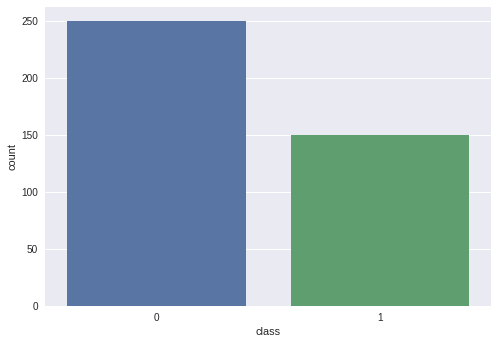

In [ ]:
# make data visualizations
sns.countplot(x=kidney_data['class'])

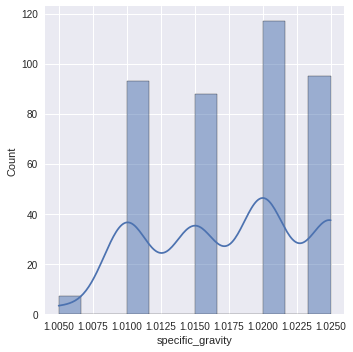

In [ ]:
sns.displot(x=kidney_data['specific_gravity'], kde=True)

## Set Predictors (X) and Target (Y) Values

In [ ]:
X = kidney_data.drop('class', axis=1)
y = kidney_data['class']

X.shape, y.shape

((400, 24), (400,))

## Feature Scaling
For scaling the features to remove bias in data, we will use Min-Max Scaling as tool. The Min-Max Scaler performs such that:
* All values are scaled in a given range
* For our data, the range is set to (0, 1)

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[3]

array([0.52272727, 0.15384615, 0.        , 0.8       , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.20299145,
       0.13992298, 0.04497354, 0.67192429, 0.        , 0.55102041,
       0.51111111, 0.18595041, 0.18595041, 1.        , 0.5       ,
       0.        , 1.        , 1.        , 1.        ])

## Data Splicing
For applying model, data needs to be split. We will use a ratio of **80-20** for our data such that:
* 80% data is kept in training set
* 20% data is kept in testing set

In [ ]:
# make train/test splits

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.3, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(280, 24)
(120, 24)
(280,)
(120,)


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(Y_train) 
print('Before', counter)
smt = SMOTE()
X_train_sm, Y_train_sm = smt.fit_resample(X_train, Y_train)
counter = Counter(Y_train_sm)
print('After', counter)


Before Counter({0: 175, 1: 105})
After Counter({1: 175, 0: 175})


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(Y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(Y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.975
Test Accuracy of KNN is 0.9333333333333333 

Confusion Matrix :- 
[[69  6]
 [ 2 43]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.92      0.95        75
           1       0.88      0.96      0.91        45

    accuracy                           0.93       120
   macro avg       0.92      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(Y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(Y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9583333333333334 

Confusion Matrix :- 
[[72  3]
 [ 2 43]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97        75
           1       0.93      0.96      0.95        45

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, Y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(Y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(Y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[74  1]
 [ 3 42]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        75
           1       0.98      0.93      0.95        45

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



Keras Functional API Model (Deep Learning Algorithm's)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings # supress warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow
from tensorflow import keras
from keras import layers , Input 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import  plot_model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras import layers

In [ ]:
top = Input(shape=(24))
t = top
t=layers.Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu')(t)
t=layers.Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu')(t);

In [ ]:
y = layers.Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu')(t)
y = Dropout(rate = 0.01)(y)
y = layers.Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu')(y)
y = Dropout(rate = 0.01)(y)

In [ ]:
x = layers.Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu')(t)
x = Dropout(rate = 0.01)(x)
x = layers.Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu')(x)
x = Dropout(rate = 0.01)(x)

In [ ]:
from tensorflow.keras.layers import concatenate
import random

In [ ]:
# merge left and right branches outputs
z = concatenate([x, y])

In [ ]:
e = layers.Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu')(z)
e = Dropout(rate = 0.01)(e)
e = layers.Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu')(e)
e = Dropout(rate = 0.02)(e)
e = layers.Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu')(e)
e = Dropout(rate = 0.01)(e)


# output layer
# e = layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')(e)
output=layers.Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid')(e)

In [ ]:
# build the model in functional API
model = Model(top, output)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 24)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           800         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 32)           1056        ['dense[0][0]']                  
                                                                                                  
 dense_4 (Dense)                (None, 64)           2112        ['dense_1[0][0]']                
                                                                                              

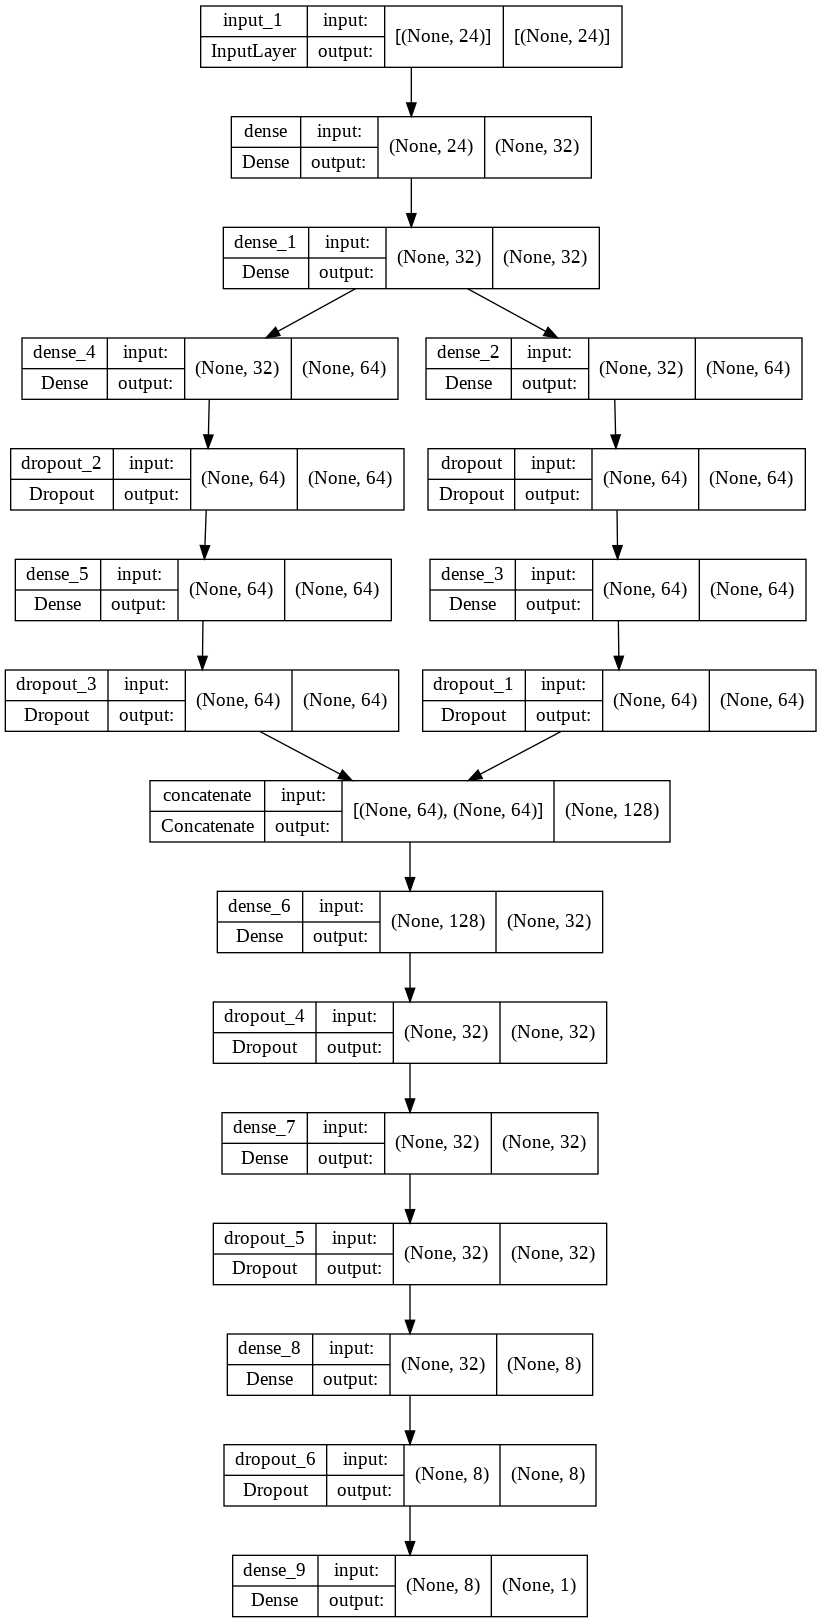

In [ ]:
from tensorflow.keras.utils import  plot_model
plot_model(model, to_file='model_API.png', show_shapes=True)

In [ ]:
# classifier loss, Adam optimizer, classifier accuracy
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.accuracy=[]
        self.val_accuracy=[]
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.accuracy.append(logs.get('accuracy'))
        self.val_accuracy.append(logs.get('val_accuracy'))
        
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

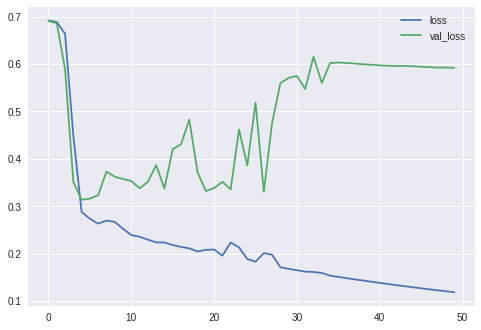

28/28 [==============================] - 0s 10ms/step - loss: 0.1187 - accuracy: 1.0000 - val_loss: 0.5920 - val_accuracy: 0.9667


In [ ]:
# train the model with input images and labels
history=model.fit(X_train,
          Y_train, 
          validation_data=(X_test, Y_test),
          epochs=50,
          batch_size=10,callbacks=[plot_losses])

In [ ]:
# model accuracy on train dataset
score = model.evaluate(X_train,
                       Y_train,
                       verbose=0)
print("\nTrain accuracy: %.1f%%" % (100.0 * score[1]))


Train accuracy: 100.0%


In [ ]:
# model accuracy on test dataset
score = model.evaluate(X_test,
                       Y_test,
                       verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 96.7%


In [ ]:
eval_score = model.evaluate(X_test, Y_test)
print("Test loss:", eval_score[0])
print("Test accuracy:", eval_score[1])

4/4 [==============================] - 0s 5ms/step - loss: 0.5920 - accuracy: 0.9667
Test loss: 0.5920479893684387
Test accuracy: 0.9666666388511658


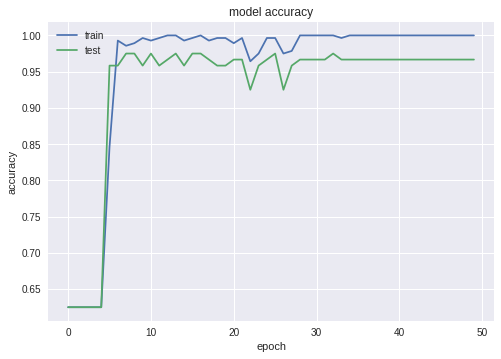

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

By using Sequential Model(ANN)

In [ ]:
# Initializing the ANN
model_Sequential = Sequential()

# Adding the input layer and the first hidden layer
model_Sequential.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 24))
model_Sequential.add(Dropout(rate = 0.1))

# Adding the second hidden layer
model_Sequential.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model_Sequential.add(Dropout(rate = 0.1))

# Adding the third hidden layer
model_Sequential.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model_Sequential.add(Dropout(rate = 0.1))

# Adding the output layer
model_Sequential.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN 
model_Sequential.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_Sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                800       
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dropout_9 (Dropout)         (None, 8)                 0         
                                                                 
 dense_13 (Dense)            (None, 1)                 9

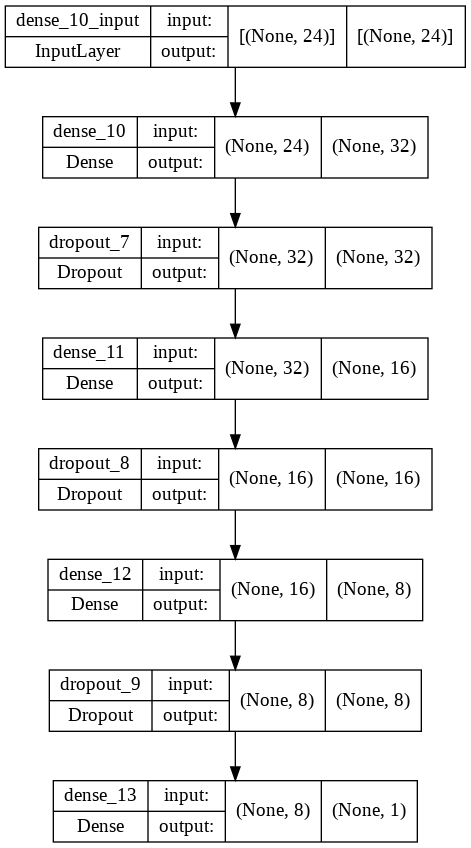

In [ ]:
plot_model(model_S, to_file = 'model.png', show_shapes = True)

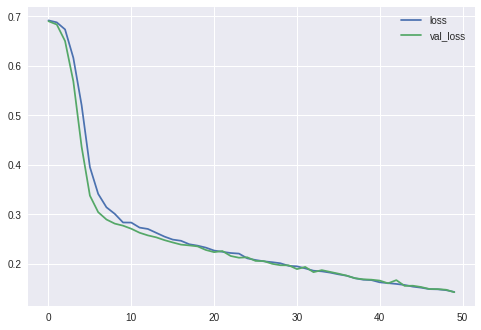

23/23 - 0s - loss: 0.1428 - accuracy: 1.0000 - val_loss: 0.1423 - val_accuracy: 1.0000 - 406ms/epoch - 18ms/step


In [ ]:
history = model_Sequential.fit(X_train, Y_train, epochs = 50, batch_size = 10, verbose = 2, validation_split = 0.2, callbacks = [plot_losses])

In [ ]:
# model accuracy on train dataset 
score = model_Sequential.evaluate(X_train, Y_train, verbose = 0)
print("\nTrain accuracy: %.1f%%" % (100.0 * score[1]))


Train accuracy: 100.0%


In [ ]:
# model accuracy on testing dataset
score = model_Sequential.evaluate(X_test, Y_test, verbose = 0)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 96.7%


In [ ]:
eval_score = model_Sequential.evaluate(X_test, Y_test)
print("Test loss:", eval_score[0])
print("Test accuracy:", eval_score[1])

4/4 [==============================] - 0s 3ms/step - loss: 0.2701 - accuracy: 0.9667
Test loss: 0.27014559507369995
Test accuracy: 0.9666666388511658


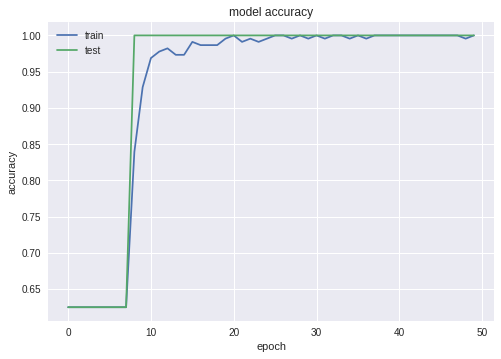

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()